In [715]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import tensorflow as tf

bibliotecas = {
    "Pandas": pd,
    "NumPy": np,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "Sklearn": sklearn,
    "TensorFlow": tf,
}
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.7.1
NumPy                |     1.23.5
Pandas               |      1.5.3
Seaborn              |     0.13.1
Sklearn              |      1.2.2
TensorFlow           |     2.15.0


# **Analisando a base de dados:**

In [716]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# Padronização e Normalização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Treinamento, validação
from sklearn.model_selection import train_test_split, KFold, cross_validate

# Métricas
from sklearn import metrics

from pprint import pprint

In [717]:
# Importando a base de treino
base = pd.read_csv("train.csv")
base_teste = pd.read_csv("test.csv")

**Analisando a base:**

In [718]:
with pd.option_context("display.max_columns", 50):
    display(base.head(3))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [719]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [720]:
base.shape

(2000, 21)

In [721]:
with pd.option_context("display.max_columns", 50):
    display(base.describe())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [722]:
base.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [723]:
base.duplicated().sum()

0

In [724]:
base.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [725]:
for i in base:
    print(i)
    print(base[i].value_counts().head(5))
    print(' ')
    print(' ')

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
Name: battery_power, dtype: int64
 
 
blue
0    1010
1     990
Name: blue, dtype: int64
 
 
clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
Name: clock_speed, dtype: int64
 
 
dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64
 
 
fc
0    474
1    245
2    189
3    170
5    139
Name: fc, dtype: int64
 
 
four_g
1    1043
0     957
Name: four_g, dtype: int64
 
 
int_memory
27    47
16    45
14    45
57    42
2     42
Name: int_memory, dtype: int64
 
 
m_dep
0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
Name: m_dep, dtype: int64
 
 
mobile_wt
182    28
101    27
185    27
146    26
199    26
Name: mobile_wt, dtype: int64
 
 
n_cores
4    274
7    259
8    256
2    247
3    246
Name: n_cores, dtype: int64
 
 
pc
10    122
7     119
9     112
20    110
1     104
Name: pc, dtype: int64
 
 
px_height
347    7
179    6
371    6
275    6
674    5
Name: px_height, dtype: int64
 
 
px_width
874    

### Primeiras conclusões:
- A base não contém valores nulos
- Todas as colunas são numéricas (float ou int)
- Temos 2000 linhas e 21 colunas
- Os dados das colunas estão em escalas diferentes
- As colunas são referentes a recursos e características dos celulares
- O target é o Price Range, que é uma classificação do preço. Os valores vão de 1 a 3.

**Visualizando as colunas:**

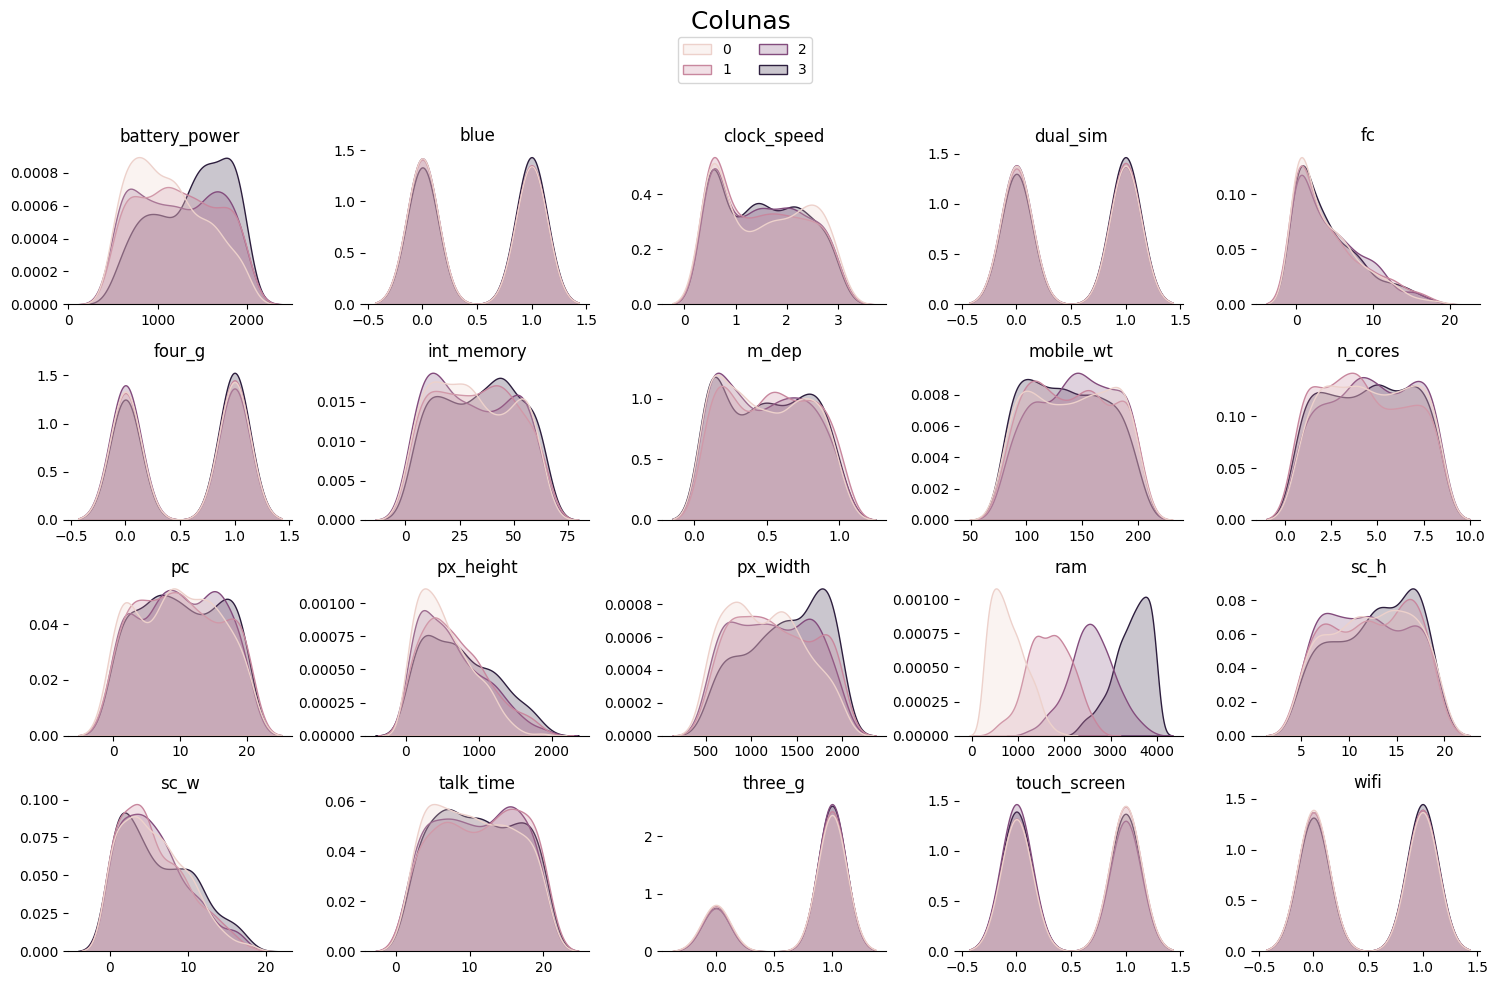

In [726]:
fig,axs = plt.subplots(nrows=4, ncols=5, figsize=(15,10), tight_layout=True)

for ax, col in zip(axs.flatten(), base.columns):
    sns.kdeplot(x=col, data=base, ax=ax, hue="price_range", fill=True, common_norm=False)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines[['top','left','right']].set_visible(False)
    legend = ax.get_legend()
    legend.remove()

fig.suptitle("Colunas \n\n\n", fontsize=18)
labels = [text.get_text() for text in legend.get_texts()]
fig.legend(loc="upper center",ncol=2,bbox_to_anchor=(0.5, 0.96),bbox_transform=fig.transFigure,handles=legend.legend_handles,labels=labels)
plt.show()

#### Aqui podemos ver as distribuições de cada coluna, baseado no price_range. Podemos notar que há diferenças nas distribuições de algumas colunas. Por exemplo:


battery_power, px_width, ram, e outras...

### Visualizando valores mais frequentes nas colunas:

In [727]:
# from pprint import pprint
for coluna  in base.columns:
    a = base.groupby('price_range')[coluna].agg(['mean','min','max','median','std'])
    print('Coluna: ',coluna)
    print(a)
    print(' ')
    print('---------------------------------------------------------------')
    print(' ')


Coluna:  battery_power
                 mean  min   max  median         std
price_range                                         
0            1116.902  503  1994  1066.0  410.801305
1            1228.868  501  1996  1206.0  438.614528
2            1228.320  501  1998  1219.5  452.863065
3            1379.984  503  1994  1449.5  414.992261
 
---------------------------------------------------------------
 
Coluna:  blue
              mean  min  max  median       std
price_range                                   
0            0.486    0    1     0.0  0.500305
1            0.490    0    1     0.0  0.500401
2            0.486    0    1     0.0  0.500305
3            0.518    0    1     1.0  0.500176
 
---------------------------------------------------------------
 
Coluna:  clock_speed
               mean  min  max  median       std
price_range                                    
0            1.5502  0.5  3.0    1.55  0.848941
1            1.4886  0.5  3.0    1.50  0.814479
2            1

Como podemos ver, em muitas colunas, conforme o valor de price_range muda no agrupamento, os valores também mudam, alguns de forma crescente e outros decrescente.
- Para visualizarmos isso, além da média, coloquei o mínimo, máximo, mediana e desvio padrão; para o caso de possíveis outliers que estejam alterando a média em si.

### **Visualizando as correlações com o mapa de calor do Seaborn**

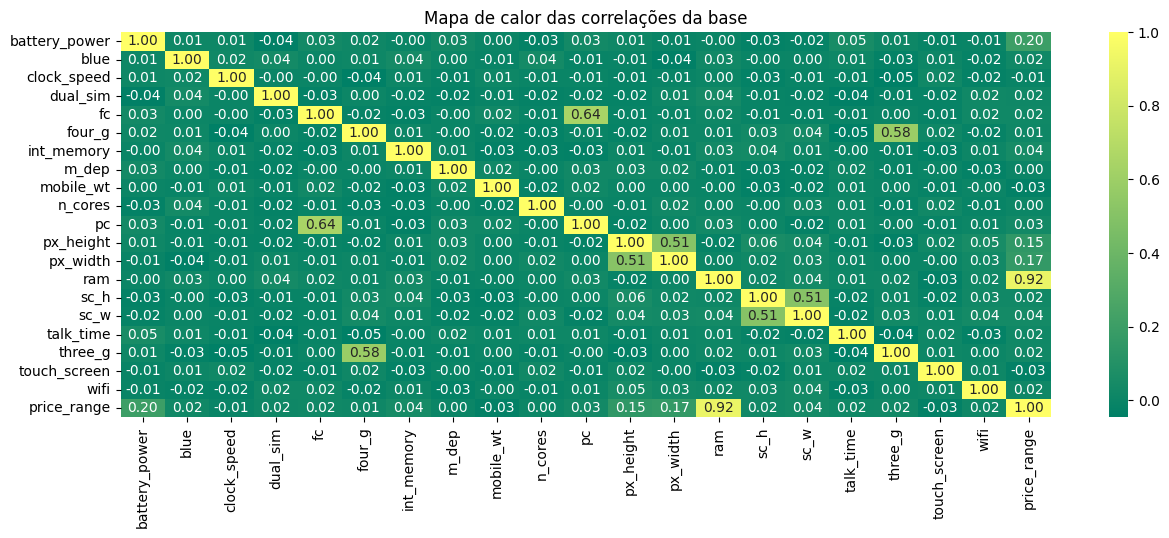

In [728]:
plt.figure(figsize=(15,5));
sns.heatmap(base.corr(), annot=True, fmt='.2f', cmap='summer');
plt.title('Mapa de calor das correlações da base');

.

In [729]:
plt.rcParams['ytick.labelleft'] = True

### **Criando função para criação de gráficos com valores de: Média, Mediana, Mínimo e Máximo**

In [730]:
def criar_grafico_col(coluna):
    a = base.groupby('price_range')[coluna].mean()
    b = base.groupby('price_range')[coluna].min()
    c = base.groupby('price_range')[coluna].max()
    d = base.groupby('price_range')[coluna].median()

    media = base[coluna].mean()
    minimo = base[coluna].min()
    maximo = base[coluna].max()
    mediana = base[coluna].median()

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
    ax[0][0].plot(a.index, a.values, label='Média por price_range')
    ax[0][0].set_xticks(a.index)
    ax[0][0].axhline(media, color='orange', linewidth=0.9, label='Média total')
    ax[0][0].legend()
    ax[0][0].set_title('Média')
    ax[0][0].yaxis.set_visible(False)
    for i in range(0,len(a.index)):
            ax[0][0].annotate(round(a.values[i],0), (i, a.values[i]), ha='center')

    ax[0][1].plot(d.index, d.values, label='Mediana por price_range')
    ax[0][1].set_xticks(d.index)
    ax[0][1].axhline(mediana, color='orange', linewidth=0.9, label='Mediana total')
    ax[0][1].legend()
    ax[0][1].set_title('Mediana')
    ax[0][1].yaxis.set_visible(False)
    for i in range(0,len(d.index)):
        ax[0][1].annotate(d.values[i], (i, d.values[i]), ha='center')

    ax[1][0].plot(b.index, b.values, label='Mínimo por price_range')
    ax[1][0].set_xticks(b.index)
    ax[1][0].axhline(minimo, color='orange', linewidth=0.9, label='Mínimo total')
    ax[1][0].legend()
    ax[1][0].set_title('Mínimo')
    ax[1][0].yaxis.set_visible(False)
    for i in range(0,len(b.index)):
        ax[1][0].annotate(b.values[i], (i, b.values[i]), ha='center')

    ax[1][1].plot(c.index, c.values, label='Máximo por price_range')
    ax[1][1].set_xticks(c.index)
    ax[1][1].axhline(maximo, color='orange', linewidth=0.9, label='Máximo total')
    ax[1][1].legend()
    ax[1][1].set_title('Máximo')
    ax[1][1].yaxis.set_visible(False)
    for i in range(0,len(c.index)):
        ax[1][1].annotate(c.values[i], (i, c.values[i]), ha='center')

    fig.suptitle(f"Coluna: {coluna}\n\n", fontsize=14)

    plt.show()

### Analisando as colunas:
- battery_power
- px_height
- ram

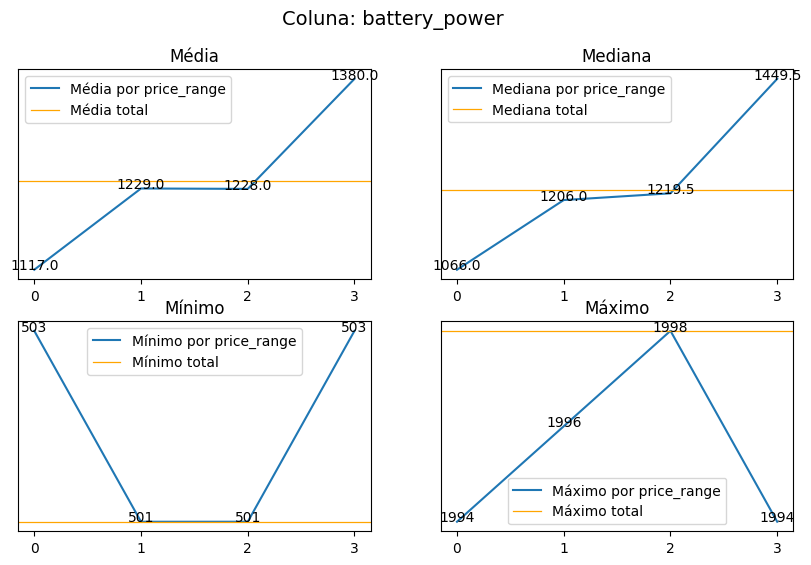

In [731]:
criar_grafico_col('battery_power')

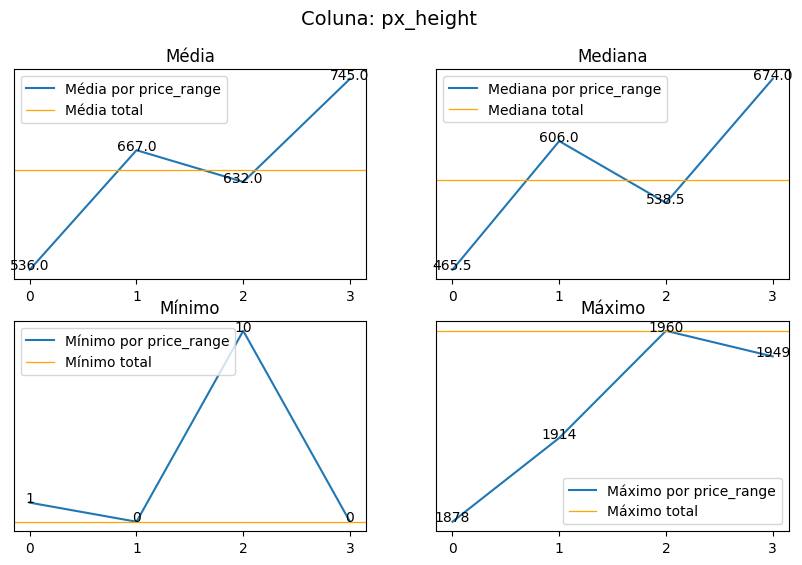

In [732]:
criar_grafico_col('px_height')

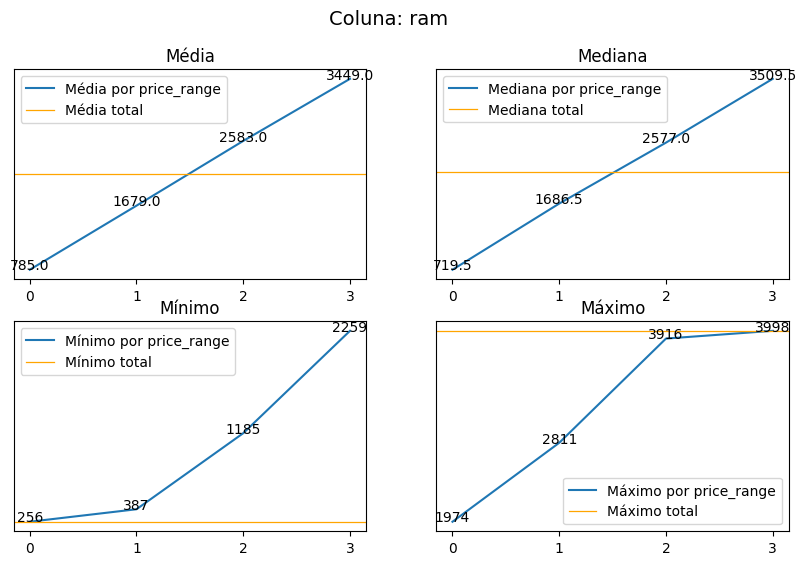

In [733]:
criar_grafico_col('ram')

### **Criando classes dos valores das colunas que possuem maiores correlações com o "price_range"**

In [734]:
col = ['battery_power','ram','px_height','px_width','price_range']

In [735]:
base_view = base[col].copy()
base_view.head()

,battery_power,ram,px_height,px_width,price_range
0,842,2549,20,756,1
1,1021,2631,905,1988,2
2,563,2603,1263,1716,2
3,615,2769,1216,1786,2
4,1821,1411,1208,1212,1


In [736]:
for i in base_view:
    print('Coluna: ',i)
    print(base_view[i].agg(['min','max','mean','std']))
    print(' ')

Coluna:  battery_power
min      501.000000
max     1998.000000
mean    1238.518500
std      439.418206
Name: battery_power, dtype: float64
 
Coluna:  ram
min      256.000000
max     3998.000000
mean    2124.213000
std     1084.732044
Name: ram, dtype: float64
 
Coluna:  px_height
min        0.000000
max     1960.000000
mean     645.108000
std      443.780811
Name: px_height, dtype: float64
 
Coluna:  px_width
min      500.000000
max     1998.000000
mean    1251.515500
std      432.199447
Name: px_width, dtype: float64
 
Coluna:  price_range
min     0.000000
max     3.000000
mean    1.500000
std     1.118314
Name: price_range, dtype: float64
 


In [737]:
base_view['ram_classe'] = pd.cut(base_view['ram'], bins=4)
base_view['battery_power_classe'] = pd.cut(base_view['battery_power'], bins=4)
base_view['px_width_classe'] = pd.cut(base_view['px_width'], bins=4)
base_view['px_height_classe'] = pd.cut(base_view['px_height'], bins=4)

In [738]:
cols_classes = ['ram_classe','battery_power_classe','px_width_classe','px_height_classe']
for i in cols_classes:
    print(base_view.groupby(i)['price_range'].mean())

ram_classe
(252.258, 1191.5]    0.146640
(1191.5, 2127.0]     1.005976
(2127.0, 3062.5]     1.982178
(3062.5, 3998.0]     2.832669
Name: price_range, dtype: float64
battery_power_classe
(499.503, 875.25]    1.256983
(875.25, 1249.5]     1.311983
(1249.5, 1623.75]    1.644172
(1623.75, 1998.0]    1.808163
Name: price_range, dtype: float64
px_width_classe
(498.502, 874.5]    1.304000
(874.5, 1249.0]     1.395257
(1249.0, 1623.5]    1.484536
(1623.5, 1998.0]    1.811395
Name: price_range, dtype: float64
px_height_classe
(-1.96, 490.0]      1.366325
(490.0, 980.0]      1.481032
(980.0, 1470.0]     1.696629
(1470.0, 1960.0]    2.066038
Name: price_range, dtype: float64


# **Criando modelos:**

# **Parte 1:**
- Feito com todas as colunas.
- Train_test_split para separar em treino e teste
- Modelo: Árvore de Classificação e KNN
- Métricas: Ácurácia e Matriz de Confusão

**Criando uma cópia da base e embaralhando**

Não é o caso dessa base, mas algumas bases podem estar ordenadas pela classe, e isso pode ser prejudicial para o aprendizado do modelo.

In [739]:
#copia_base = base.copy()
#copia_base = copia_base.sample(frac=1).reset_index(drop=True)

In [740]:
x = base.drop('price_range',axis=1)
y = base.price_range

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0, stratify=y)

In [741]:
clf_ad = tree.DecisionTreeClassifier(max_depth=8,random_state=0, criterion='gini')
clf_ad = clf_ad.fit(xtrain,ytrain)
prev = clf_ad.predict(xtest)
metrics.confusion_matrix(ytest,prev)

array([[90, 10,  0,  0],
       [ 7, 85,  8,  0],
       [ 0, 12, 77, 11],
       [ 0,  0, 13, 87]])

In [742]:
prev_base_teste1 = clf_ad.predict(base_teste.drop('id',axis=1))
resultado_id = pd.DataFrame({'id':np.arange(1,1001)})
resultado_1_1 = pd.DataFrame(prev_base_teste1,columns=['Target_Parte_1_1'])
resultado_1_1 = pd.concat([resultado_id,resultado_1_1],axis=1)
resultado_1_1.head(10)

,id,Target_Parte_1_1
0,1,3
1,2,3
2,3,3
3,4,3
4,5,1
5,6,3
6,7,3
7,8,1
8,9,3
9,10,0


In [743]:
metrics.accuracy_score(ytest, prev)

0.8475

In [744]:
knn = KNeighborsClassifier(n_neighbors=15)
knn = knn.fit(xtrain, ytrain)
prev_knn = knn.predict(xtest)
metrics.confusion_matrix(ytest, prev_knn)

array([[98,  2,  0,  0],
       [ 6, 92,  2,  0],
       [ 0,  6, 91,  3],
       [ 0,  0,  8, 92]])

In [745]:
metrics.accuracy_score(ytest, prev_knn)

0.9325

In [746]:
prev_base_teste2 = knn.predict(base_teste.drop('id',axis=1))
resultado_1_2 = pd.DataFrame(prev_base_teste2,columns=['Target_Parte_1_2'])
resultado_1_2.head(10)

,Target_Parte_1_2
0,3
1,3
2,2
3,3
4,1
5,3
6,3
7,1
8,3
9,0


**Como podemos ver, o coluna "ram" possui 0.9 de correlação com a classe de preço dos celulares, ou seja, este é basicamente o fator determinante para a previsão final. O modelo KNN feito acima sem alterar a escala de dados performou muito bem, pois essa coluna coincidemente tem a maior escala, quando comparada as outras. Isso fez com que essa coluna tivesse o maior peso.**

**Resultados da parte 1:**

O modelo KNN performou melhor do que a árvore de Decisão neste conjunto de dados, com acurácia de 93.25 contra 83.25.

Obs: Temos que ter em mente que isso não é o suficiente para que seja um modelo em produção, devemos nos atentar a mais detalhes.

Abaixo seguem as previsões da base de teste que importei no início do notebook.

In [747]:
resultados_modelos = pd.concat([resultado_1_1, resultado_1_2],axis=1)
resultados_modelos.head()

,id,Target_Parte_1_1,Target_Parte_1_2
0,1,3,3
1,2,3,3
2,3,3,2
3,4,3,3
4,5,1,1


# **Parte 2:**
- Escolhendo colunas para o treino
- Alterando a escala dos dados
- Fazendo Validação Cruzada
- Usando Pipeline
- Modelos: KNN e Random Forest
- Métricas: Acurácia e Matriz de Confusão

**Visualizando novamente o mapa de calor das correlações**

<Axes: >

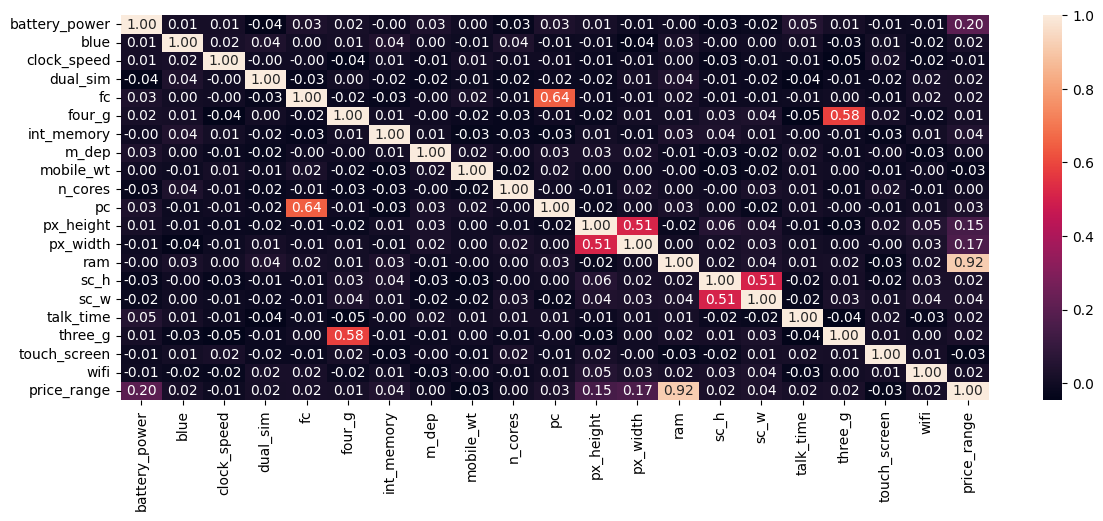

In [748]:
plt.figure(figsize=(14,5))
sns.heatmap(base.corr(), annot=True, fmt='.2f')

In [749]:
# Bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [750]:
# Separando X e y, e Treino e teste
x = base[['ram','battery_power','px_height','px_width']]
y = base.price_range

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0, stratify=y)

### **KNN**

In [751]:
modelo = KNeighborsClassifier(n_neighbors=13)
pipeline1 = Pipeline(
    [
        ("MinMaxScaler", MinMaxScaler()),
        ('Modelo', modelo)])

scores = cross_validate(pipeline1, xtrain, ytrain, cv=10, scoring="accuracy")
scores_df = pd.DataFrame(scores)
print("Média dos Scores - Cross Validation: ",scores_df.test_score.mean())

pipe_fit_knn = pipeline1.fit(xtrain, ytrain)
prev = pipe_fit_knn.predict(xtest)
print("Acurácia - ytest e previsão: ",metrics.accuracy_score(ytest,prev))

Média dos Scores - Cross Validation:  0.9
Acurácia - ytest e previsão:  0.9


In [752]:
metrics.confusion_matrix(ytest, prev)

array([[97,  3,  0,  0],
       [ 7, 89,  4,  0],
       [ 0,  8, 86,  6],
       [ 0,  0, 12, 88]])

In [753]:
prev_base_teste3 = pipe_fit_knn.predict(base_teste[['ram','battery_power','px_height','px_width']])
resultado_parte2_1 = pd.DataFrame(prev_base_teste3,columns=['Target_Parte_2_1'])
resultado_parte2_1.head(10)

,Target_Parte_2_1
0,2
1,3
2,3
3,3
4,1
5,3
6,3
7,1
8,3
9,0


In [754]:
resultados_modelos = pd.concat([resultados_modelos, resultado_parte2_1], axis=1)
resultados_modelos.head()

,id,Target_Parte_1_1,Target_Parte_1_2,Target_Parte_2_1
0,1,3,3,2
1,2,3,3,3
2,3,3,2,3
3,4,3,3,3
4,5,1,1,1


### **Random Forest**

In [755]:
modelo2 = RandomForestClassifier(n_estimators=40, max_depth=9, min_samples_split=10, random_state=0)
pipeline2 = Pipeline(
    [
        #("MinMaxScaler", MinMaxScaler()),   # Essa etapa não influencia em um modelo de árvores
        ('Modelo', modelo2)])

scores = cross_validate(pipeline2, xtrain, ytrain, cv=10, scoring="accuracy")
scores_df = pd.DataFrame(scores)
print(" Média dos Scores - Cross Validation: ",scores_df.test_score.mean())

pipe_fit_rf = pipeline2.fit(xtrain, ytrain)
prev = pipe_fit_rf.predict(xtest)
print("Acurácia - ytest e previsão: ",metrics.accuracy_score(ytest, prev))

 Média dos Scores - Cross Validation:  0.8918750000000001
Acurácia - ytest e previsão:  0.91


In [756]:
metrics.confusion_matrix(ytest, prev)

array([[98,  2,  0,  0],
       [ 4, 92,  4,  0],
       [ 0,  7, 85,  8],
       [ 0,  0, 11, 89]])

In [757]:
prev_base_teste4 = pipe_fit_rf.predict(base_teste[['ram','battery_power','px_height','px_width']])
resultado_parte2_2 = pd.DataFrame(prev_base_teste4,columns=['Target_Parte_2_2'])
resultado_parte2_2.head(10)

,Target_Parte_2_2
0,3
1,3
2,2
3,3
4,1
5,3
6,3
7,1
8,3
9,0


In [758]:
resultados_modelos = pd.concat([resultados_modelos, resultado_parte2_2], axis=1)
resultados_modelos.head()

,id,Target_Parte_1_1,Target_Parte_1_2,Target_Parte_2_1,Target_Parte_2_2
0,1,3,3,2,3
1,2,3,3,3,3
2,3,3,2,3,2
3,4,3,3,3,3
4,5,1,1,1,1


# **Parte 3:**
- Rede Neural
- Rede com mais de uma camada
- Dropout para evitar possível overfitting

In [759]:
import tensorflow as tf
from tensorflow import keras

In [760]:
x = base[['ram','battery_power','px_height','px_width']]
y = base.price_range

xtrain, xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [761]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(xtrain.shape[1])))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                320       
                                                                 
 dense_49 (Dense)            (None, 128)               8320      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 256)               33024     
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_51 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 42692 (166.77 KB)
Trainable params: 426

In [762]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [763]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=7, verbose=1, restore_best_weights=True )
history = model.fit(xtrain, ytrain, epochs=200, batch_size=256, validation_split=0.1, callbacks=[early_stop])

Epoch 1/200
6/6 [==============================] - 1s 59ms/step - loss: 1.3178 - sparse_categorical_accuracy: 0.4146 - val_loss: 1.1633 - val_sparse_categorical_accuracy: 0.6125
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 1.1202 - sparse_categorical_accuracy: 0.5243 - val_loss: 0.9467 - val_sparse_categorical_accuracy: 0.6125
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.9233 - sparse_categorical_accuracy: 0.5764 - val_loss: 0.7431 - val_sparse_categorical_accuracy: 0.6812
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 0.7410 - sparse_categorical_accuracy: 0.6910 - val_loss: 0.5814 - val_sparse_categorical_accuracy: 0.7688
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 0.5892 - sparse_categorical_accuracy: 0.7993 - val_loss: 0.4682 - val_sparse_categorical_accuracy: 0.8438
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4643 - sparse_categorical_accuracy: 

In [764]:
model.evaluate(xtest, ytest)

13/13 [==============================] - 0s 2ms/step - loss: 0.1347 - sparse_categorical_accuracy: 0.9350


[0.134653702378273, 0.9350000023841858]

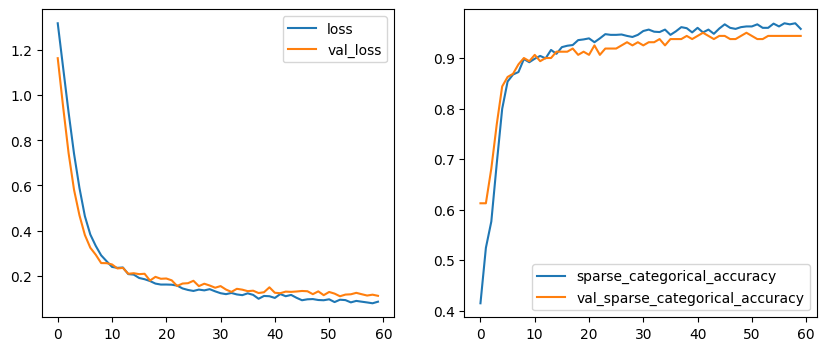

In [765]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].legend()
ax[1].plot(history.history['sparse_categorical_accuracy'],label='sparse_categorical_accuracy')
ax[1].plot(history.history['val_sparse_categorical_accuracy'], label='val_sparse_categorical_accuracy')
ax[1].legend()
plt.show()

In [766]:
def transformar_base(x):
  x = x[['ram','battery_power','px_height','px_width']]
  x = scaler.transform(x)
  return x

tra = transformar_base(base_teste)
predictions = model.predict(tra)
predict_classes = tf.argmax(predictions, axis=1).numpy()
predict_classes

32/32 [==============================] - 0s 2ms/step


array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [767]:
resultado_parte_3 = pd.DataFrame(predict_classes, columns=['Target_Parte_3'])
resultado_parte_3.head(10)

,Target_Parte_3
0,3
1,3
2,2
3,3
4,1
5,3
6,3
7,1
8,3
9,0


# **Explorando os resultados dos modelos:**

**Visualizando os resultados dos modelos:**

In [768]:
resultados_modelos = pd.concat([resultados_modelos,resultado_parte_3],axis=1)
resultados_modelos.head(20)

,id,Target_Parte_1_1,Target_Parte_1_2,Target_Parte_2_1,Target_Parte_2_2,Target_Parte_3
0,1,3,3,2,3,3
1,2,3,3,3,3,3
2,3,3,2,3,2,2
3,4,3,3,3,3,3
4,5,1,1,1,1,1
5,6,3,3,3,3,3
6,7,3,3,3,3,3
7,8,1,1,1,1,1
8,9,3,3,3,3,3
9,10,0,0,0,0,0


**Separando apenas as previsões que usarei no laço for de comparação**

- Modelo KNN da parte 1
- Modelo Random Forest Classifier da parte 2
- Modelo de Rede Neural da parte 3

In [769]:
base_comparacoes = resultados_modelos[['Target_Parte_1_2','Target_Parte_2_2','Target_Parte_3']]
base_comparacoes.head()

,Target_Parte_1_2,Target_Parte_2_2,Target_Parte_3
0,3,3,3
1,3,3,3
2,2,2,2
3,3,3,3
4,1,1,1


**Laço for que percorre as linhas da base e retorna os indices de onde as previsões não foram iguais**

In [770]:
indices_com_resultados_diferentes = []
for indice, predict in base_comparacoes.iterrows():
  if predict['Target_Parte_2_2'] != predict['Target_Parte_3'] or predict['Target_Parte_1_2'] != predict['Target_Parte_3'] or predict['Target_Parte_1_2'] != predict['Target_Parte_2_2']:
    indices_com_resultados_diferentes.append(indice)
print(len(indices_com_resultados_diferentes))


104


**Visualizando os índices:**

In [771]:
print(indices_com_resultados_diferentes)

[21, 28, 34, 55, 63, 64, 66, 80, 88, 93, 95, 104, 111, 124, 129, 132, 136, 141, 143, 172, 198, 201, 203, 208, 211, 212, 220, 221, 234, 235, 269, 272, 279, 330, 340, 352, 356, 360, 380, 414, 424, 437, 438, 448, 453, 458, 460, 461, 468, 474, 477, 481, 489, 509, 518, 530, 534, 535, 541, 573, 575, 583, 598, 634, 637, 664, 691, 707, 709, 711, 727, 732, 735, 738, 750, 762, 764, 769, 771, 773, 787, 789, 792, 797, 813, 825, 838, 851, 869, 872, 875, 884, 892, 902, 913, 927, 929, 931, 938, 940, 952, 955, 975, 976]


**Visualizando os resultados:**

In [772]:
resultados_modelos = resultados_modelos.drop(['Target_Parte_1_1','Target_Parte_2_1'],axis=1)
resultados_modelos.iloc[indices_com_resultados_diferentes]

,id,Target_Parte_1_2,Target_Parte_2_2,Target_Parte_3
21,22,3,3,2
28,29,3,2,3
34,35,0,0,1
55,56,0,1,1
63,64,1,2,1
...,...,...,...,...
940,941,2,2,3
952,953,2,3,2
955,956,2,2,3
975,976,0,1,1


Obs: A base de teste não possui os rótulos reais para comparar as previsões.

Acima coloquei os resultados dos modelos em um DataFrame, para que assim, pudesse comparar as previsões. Com isso, é possível ter uma ideia se os modelos estão performando de maneira parecida com a base de teste, se há grandes discrepâncias e se os melhores modelos da etapas de treino/validação estão prevendo resultados semelhantes.

